In [1]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2') 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))

318
312
311
310
310


In [3]:
target = np.loadtxt('../proxy/cluster/GXsub_DM_InL_rcin200_100000_TMP.txt')[loc]

In [4]:
# plt.figure(figsize = (11,3))

def plot_D3(ax):
    maind = np.loadtxt('../proxy/GadgetX_DS_main_v2')
    maind = maind[loc,1:]

    oPDF_score1 = np.loadtxt('../data/oob_oPDF/oPDF_oob_score1')
    RF1 = np.mean(oPDF_score1, axis = 1) 

    cc = np.zeros(26)
    for i in range(26):
        cc[i] = np.corrcoef(maind[:,i],target)[0][1]

    labels = [r'$\eta$','$\Delta_r$','$f_s$',r'$\chi_{\rm DS}$',r'$c/a$',r'$\dot{M}_\mathrm{a}$',
             r'$f_{\rm ste}$',r'$M$1',r'$M$2', '$r$1', '$r$2', r'$f_{\rm red}$',
             r'$M_*$',r'$M_{\rm gas}$', r'$\Delta_{\rm o}$', r'$\sigma_V$',r'$\lambda_{\rm t}$',
             r'$\lambda_{\rm gas}$',r'$\lambda_{\rm star}$',r'$Z_{\rm gas}$',r'$Z_{\rm star}$',r'$\rm age$',
             r'$\rm SFR$', r'$T_{500}$', r'$n_e$',r'$K_{500}$']

    wd = 1
    dx = 4
    xx1 = np.arange(0.5,0.5+dx*26,dx) - wd/2
    ax.bar(xx1, np.abs(cc), color = 'r', width = wd, alpha = 0.7,label = r'$|\gamma|$')
    xx2 = np.arange(0.5,0.5+dx*26,dx) + wd/2
    ax.bar(xx2, RF1, color = 'b', width = wd, alpha = 0.7,label = r'$R^2$')
    # xx3 = np.arange(0.5,0.5+dx*27,dx) + wd
    # plt.bar(xx3, np.mean(ooblack1, axis = 1), color = 'k', width = wd, alpha = 0.7,label = r'$lack R^2$')
    print(cc)
    print(RF1)

    ax.set_xticks(np.arange(0.5,0.5+dx*26,dx))
    ax.set_xticklabels(labels)
    # plt.ylabel(r'$N_{\rm int}$', fontsize = 12)

    ax.grid(c = 'grey',axis = 'x', ls  = '--', alpha = 0.5)

    ax.axhline(0,color = 'k')
    ax.tick_params(top = 'on', right = 'on', which='both',direction = 'in',labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 12)
    bwith = 1.2 #边框宽度设置为2
#     ax = plt.gca()#获取边框
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

    ax.set_xlim(-1.5,0.5+dx*26-1)

#     ax.legend()

# plt.savefig('./figs/one.pdf')

In [5]:
#subplots for X-ray, SZ and optical map
def plot_Xray(ax):
    
    Xray_score1 = np.loadtxt('../data/oob_Xray/Xray_oob_score1')
    Xray_RF1 = np.mean(Xray_score1, axis = 1) 

    Xrayd = np.loadtxt('../proxy/GadgetX_DS_Xray')[loc,1:]
    print(Xrayd.shape)
    Xray_cc = np.zeros(7)
    for i in range(7):
        Xray_cc[i] = np.corrcoef(Xrayd[:,i],target)[0][1]

    labels = [r'$A$', r'$c$', r'$P$', r'$w$', r'$S$', r'$G$', r'$M$']

    wd = 1
    dx = 4
    xx1 = np.arange(0.5,0.5+dx*7,dx) - wd/2
    ax.bar(xx1, np.abs(Xray_cc), color = 'r', width = wd, alpha = 0.7,label = r'$|\gamma|$')
    xx2 = np.arange(0.5,0.5+dx*7,dx) + wd/2
    ax.bar(xx2, Xray_RF1, color = 'b', width = wd, alpha = 0.7,label = r'$R^2$')
    # xx3 = np.arange(0.5,0.5+dx*27,dx) + wd
    # plt.bar(xx3, np.mean(ooblack1, axis = 1), color = 'k', width = wd, alpha = 0.7,label = r'$lack R^2$')
    print(Xray_cc)
    print(Xray_RF1)
    
    ax.set_xticks(np.arange(0.5,0.5+dx*7,dx))
    ax.set_xticklabels(labels)

    ax.grid(c = 'grey',axis = 'x', ls  = '--', alpha = 0.5)

    ax.axhline(0,color = 'k')
    ax.tick_params(top = 'on', right = 'on', which='both',direction = 'in',labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 12)
    bwith = 1.2 #边框宽度设置为2
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

    ax.set_xlim(-1.5,0.5+dx*7-1)
    ax.set_ylim(-0.15,0.6)
    ax.text(0.35,0.45,'X-ray', weight = 'demibold')

#     ax.legend()

In [6]:
#subplots for X-ray, SZ and optical map

def plot_SZ(ax):
    SZ_score1 = np.loadtxt('../data/oob_SZ/SZ_oob_score1')
    SZ_RF1 = np.mean(SZ_score1, axis = 1) 

    SZd = np.loadtxt('../proxy/GadgetX_DS_SZ')[loc,1:]
    SZ_cc = np.zeros(7)
    for i in range(7):
        SZ_cc[i] = np.corrcoef(SZd[:,i],target)[0][1]

    labels = [r'$A$', r'$c$', r'$P$', r'$w$', r'$S$', r'$G$', r'$M$']

    wd = 1
    dx = 4
    xx1 = np.arange(0.5,0.5+dx*7,dx) - wd/2
    ax.bar(xx1, np.abs(SZ_cc), color = 'r', width = wd, alpha = 0.7,label = r'$|\gamma|$')
    xx2 = np.arange(0.5,0.5+dx*7,dx) + wd/2
    ax.bar(xx2, SZ_RF1, color = 'b', width = wd, alpha = 0.7,label = r'$R^2$')
    # xx3 = np.arange(0.5,0.5+dx*27,dx) + wd
    # plt.bar(xx3, np.mean(ooblack1, axis = 1), color = 'k', width = wd, alpha = 0.7,label = r'$lack R^2$')
    print(SZ_cc)
    print(SZ_RF1)

    ax.set_xticks(np.arange(0.5,0.5+dx*7,dx))
    ax.set_xticklabels(labels)
    # plt.ylabel(r'$N_{\rm int}$', fontsize = 12)


    ax.grid(c = 'grey',axis = 'x', ls  = '--', alpha = 0.5)

    ax.axhline(0,color = 'k')
    ax.tick_params(top = 'on', right = 'on', which='both',direction = 'in',labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 12)
    bwith = 1.2 #边框宽度设置为2
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

    ax.set_xlim(-1.5,0.5+dx*7-1)
    ax.set_ylim(-0.15,0.6)
    ax.text(0.35,0.45,'SZ', weight = 'demibold')

#     ax.legend(fontsize = 'small',loc = 'upper center')

In [7]:
#subplots for X-ray, SZ and optical map
def plot_Offset(ax):
    Offset_score1 = np.loadtxt('../data/oob_Offset/Offset_oob_score1')
    Offset_RF1 = np.mean(Offset_score1, axis = 1) 

    Offsetd = np.loadtxt('../proxy/GadgetX_DS_Offset')[loc,1:]
    Offset_cc = np.zeros(15)
    for i in range(15):
        Offset_cc[i] = np.corrcoef(Offsetd[:,i],target)[0][1]

    labels = [r'$R_{\rm BCG}$', r'$R_{\rm SZ}$', r'$R_{\rm X}$', r'$R_{\rm Py}$', r'$R_{\rm PX}$',
              r'$O_{\rm BCG-SZ}$', r'$O_{\rm BCG-X}$', r'$O_{\rm BCG-Py}$' ,r'$O_{\rm BCG-PX}$',
             r'$O_{\rm SZ-X}$',r'$O_{\rm SZ-Py}$',r'$O_{\rm SZ-PX}$',
             r'$O_{\rm X-Py}$',r'$O_{\rm X-PX}$',r'$O_{\rm Py-PX}$']

    wd = 1
    dx = 4
    xx1 = np.arange(0.5,0.5+dx*15,dx) - wd/2
    ax.bar(xx1, np.abs(Offset_cc), color = 'r', width = wd, alpha = 0.7,label = r'$|\gamma|$')
    xx2 = np.arange(0.5,0.5+dx*15,dx) + wd/2
    ax.bar(xx2, Offset_RF1, color = 'b', width = wd, alpha = 0.7,label = r'$R^2$')
    # xx3 = np.arange(0.5,0.5+dx*27,dx) + wd
    # plt.bar(xx3, np.mean(ooblack1, axis = 1), color = 'k', width = wd, alpha = 0.7,label = r'$lack R^2$')
    print(Offset_cc)
    print(Offset_RF1)

    ax.set_xticks(np.arange(0.5,0.5+dx*15,dx))
    ax.set_xticklabels(labels)
    # plt.ylabel(r'$N_{\rm int}$', fontsize = 12)


    ax.grid(c = 'grey',axis = 'x', ls  = '--', alpha = 0.5)

    ax.axhline(0,color = 'k')
    ax.tick_params(top = 'on', right = 'on', which='both',direction = 'in',labelsize = 10)
    ax.tick_params(axis = 'x', labelsize = 8)
    bwith = 1.2 #边框宽度设置为2
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

    ax.set_xlim(-1.5,0.5+dx*15-1)
    ax.set_ylim(-0.15,0.6)
    ax.text(52,0.45,'Offset', weight = 'demibold')

#     ax.legend(fontsize = 'small',loc = 'upper center')

## All presentation

<IPython.core.display.Javascript object>


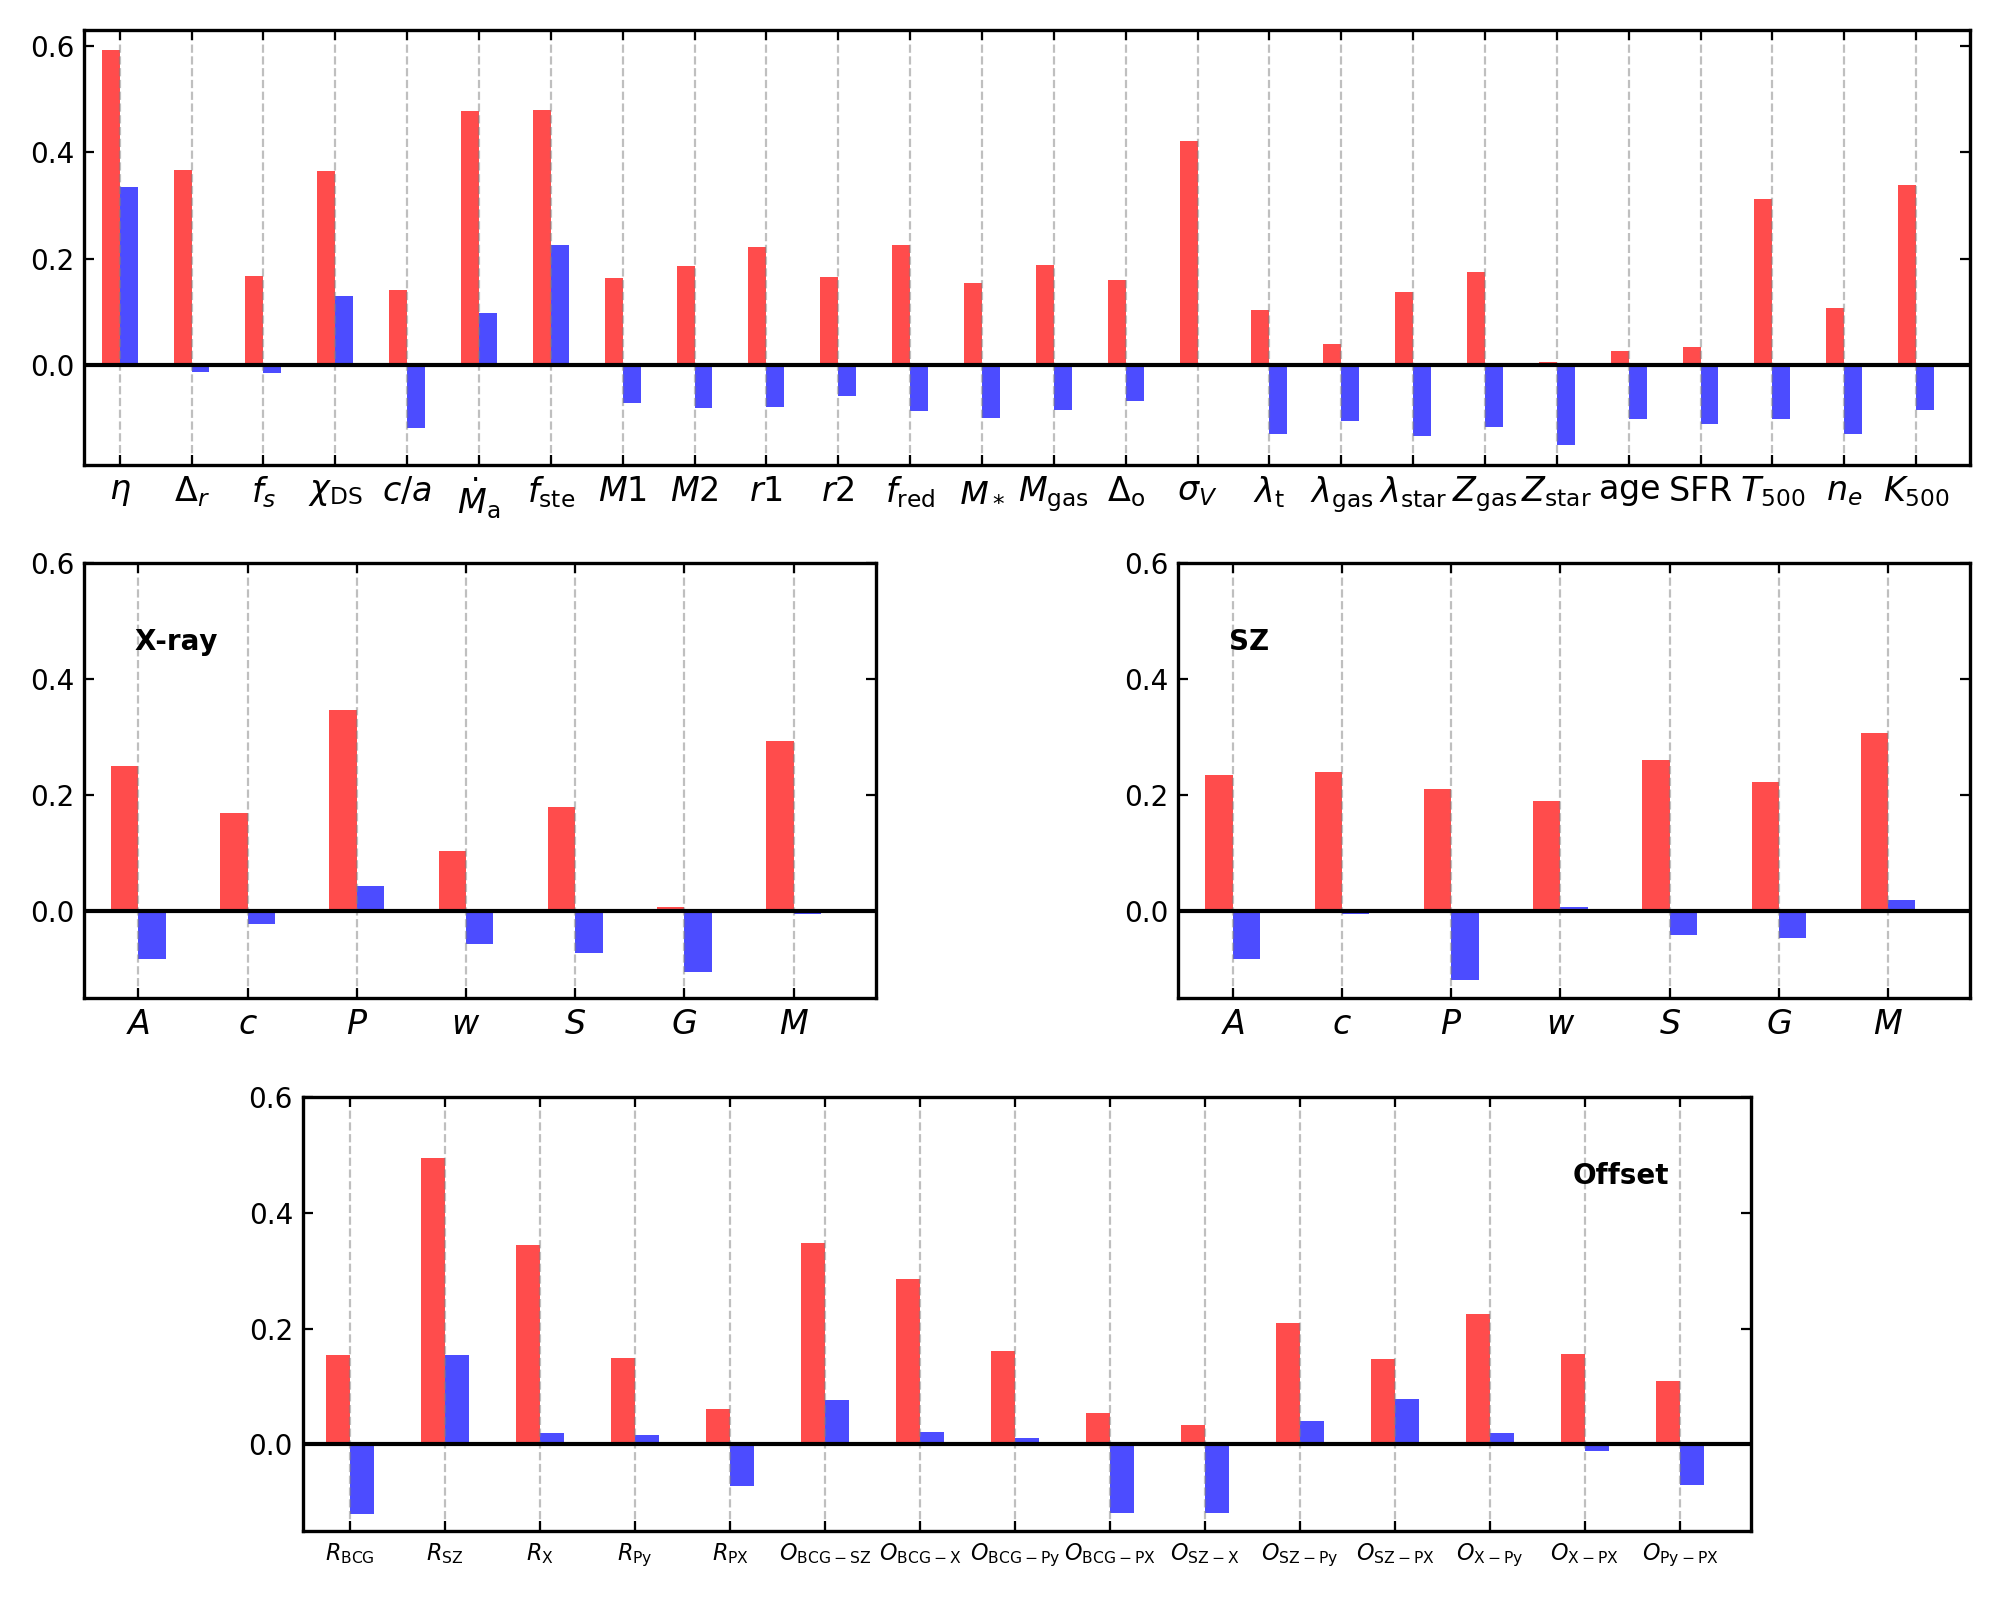

[ 0.59284893  0.36637381  0.1670687  -0.36425334 -0.14127326  0.47832956
 -0.48015676  0.16394957  0.1867964  -0.22169747 -0.16604394 -0.22655027
  0.15437896  0.18751018  0.16007741  0.42044947  0.10390535  0.03918568
  0.13704054 -0.17562277 -0.00526333 -0.02626561  0.03486654  0.3123271
  0.10784479  0.33823261]
[ 0.33447572 -0.01352232 -0.01477468  0.13048576 -0.1188925   0.09742764
  0.22511888 -0.0716356  -0.07964408 -0.0792363  -0.05774564 -0.08690624
 -0.09915754 -0.08526838 -0.06792102 -0.00209846 -0.1289525  -0.10547
 -0.13280542 -0.11623868 -0.15046564 -0.1018081  -0.1107701  -0.10103058
 -0.12963466 -0.08400922]
(310, 7)
[ 0.24996587 -0.1699185   0.3473406   0.1033087   0.18017328  0.00750434
  0.29419219]
[-0.08172346 -0.0217069   0.04267652 -0.05700844 -0.07265944 -0.1052404
 -0.005072  ]


/home/qyli/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


[ 0.23416832 -0.24008993  0.21073437  0.18997421  0.26044828 -0.22272257
  0.30772318]
[-0.083219   -0.00542242 -0.11850004  0.0080523  -0.04076244 -0.0463512
  0.01858262]
[0.15449148 0.49348126 0.34358923 0.14856017 0.06175416 0.34765518
 0.28454782 0.16052833 0.05364894 0.03431021 0.20996623 0.14777149
 0.22544218 0.15666078 0.11022939]
[-0.1192133   0.15477402  0.01974824  0.01623612 -0.07077462  0.07636182
  0.0218449   0.01198178 -0.1184868  -0.11790118  0.04005132  0.0786238
  0.01986868 -0.0111865  -0.07038308]


In [8]:
plt.figure(figsize = (10,8))
axD3 = plt.subplot2grid((6,9),(0,0),colspan = 11,rowspan = 2)
axXray = plt.subplot2grid((6,9),(2,0),colspan = 4,rowspan = 2)
axSZ = plt.subplot2grid((6,9),(2,5),colspan = 4,rowspan = 2)
axOffset = plt.subplot2grid((6,9),(4,1),colspan = 7,rowspan = 2)

plot_D3(axD3)
plot_Xray(axXray)
plot_SZ(axSZ)
plot_Offset(axOffset)

plt.tight_layout()

# plt.savefig('./figs/rfcc.pdf')